# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [108]:
df = pd.read_csv('25__iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 1. Ogólny przegląd danych

### Kilka obrazków abyśmy mieli wyobrażenie nad czym pracujemy

<table>
    <tr>
        <td align='center'>
            <div style="font-weight:bold; font-size:18px; margin-bottom:5px;">Iris virginica</div>
            <img src="https://www.fs.usda.gov/wildflowers/beauty/iris/Blue_Flag/images/iris_virginica/iris_virginica_virginica_lg.jpg" alt="Iris virginica" title="Iris virginica" width=300/><br>
            Iris virginica ( Iris virginica ) to wieloletnia roślina kwitnąca, uważana za łatwą w uprawie. Iris virginica najlepiej rośnie w półcieniu lub pełnym słońcu. Gatunek ten ma kłącza, które rozprzestrzeniają się pod ziemią i mogą być rozmnażane jako roślina doniczkowa.
        </td>
        <td align='center'>
            <div style="font-weight:bold; font-size:18px; margin-bottom:5px;">Iris versicolor</div>
            <img src="https://hortensje.pl/userdata/public/gfx/7666/iris-versicolor-2.webp" alt="Iris versicolor" title="Iris versicolor" width=300/><br>
            Iris versicolor to rzadko spotykana odmiana, dorastająca docelowo do około 70 cm wysokości. Jej młode pędy mają niezwykle dekoracyjny, fioletowy kolor. Kosaciec ma niebieskie kwiatostany i kwitnie na przełomie maja i czerwca. Roślina tworzy okazałe kępy. Najlepiej rośnie w glebie żyznej i wilgotnej. Najpiękniej prezentuje się nad brzegami oczek wodnych oraz w towarzystwie piwoni. Warto go sadzić w miejscach wypoczynkowych, ponieważ roślina przyciąga motyle. Jest całkowicie odporna na mróz w naszym klimacie.
        </td>
        <td align='center'>
            <div style="font-weight:bold; font-size:18px; margin-bottom:5px;">Iris setosa</div>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/1280px-Irissetosa1.jpg" alt="Iris setosa" title="Iris setosa" width=300/><br>
            Iris setosa, znany również jako kosaciec szczecinkowy, to bylina z rodziny kosaćcowatych, charakteryzująca się niskim wzrostem (do 30 cm) i fioletowymi kwiatami. Jego liście są mieczowate, a kwiaty wyróżniają się zredukowanymi górnymi płatkami i szerokimi, opadającymi dolnymi. Roślina preferuje stanowiska słoneczne, umiarkowanie wilgotne, glebę żyzną, próchniczą i o odczynie kwaśnym
        </td>
    </tr>
</table>

In [109]:
# poznaje rozmiar zbioru
df.shape

(150, 5)

### w zbiorze mam 150 rekordów w 5 kolumnach

In [110]:
# pobieram próbkę danych żeby zobaczyć z czym mam do czynienia
df.sample(10)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
133,6.3,2.8,5.1,1.5,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
67,5.8,2.7,4.1,1.0,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa


In [111]:
# podglądam unikalne wartości
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

In [145]:
# sprawdzam duplikaty
df[df.duplicated(keep=False)]

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [112]:
# podsumowanie danych
df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Analiza brakujących wartości

In [113]:
# sprawdzam czy są puste wartości
nulls_summary = pd.DataFrame(df.isnull().any(), columns=["Nulls"])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round(nulls_summary['Num_of_nulls [qty]']/len(df)*100,2)

nulls_summary


,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
długość kielicha (sepal length),False,0,0.0
szerokość kielicha (sepal width),False,0,0.0
długość płatka (petal length),False,0,0.0
szerokość płatka (petal width),False,0,0.0
klasa (class),False,0,0.0


#### brak pustych wartości, dane kompletne

# 3. Analiza pojedyńczych zmiennych

array([[<Axes: title={'center': 'długość kielicha (sepal length)'}>,
        <Axes: title={'center': 'szerokość kielicha (sepal width)'}>],
       [<Axes: title={'center': 'długość płatka (petal length)'}>,
        <Axes: title={'center': 'szerokość płatka (petal width)'}>]],
      dtype=object)

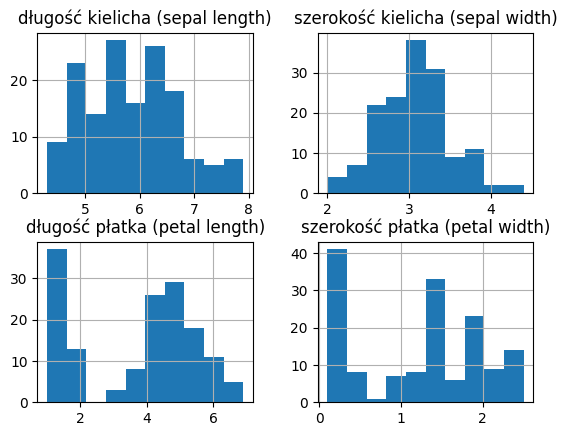

In [114]:
# ogólny histogram pokazujący ogólny rozkład danych
df.hist()

### Histogram z uwzględnieniem poszczególnych gatunków

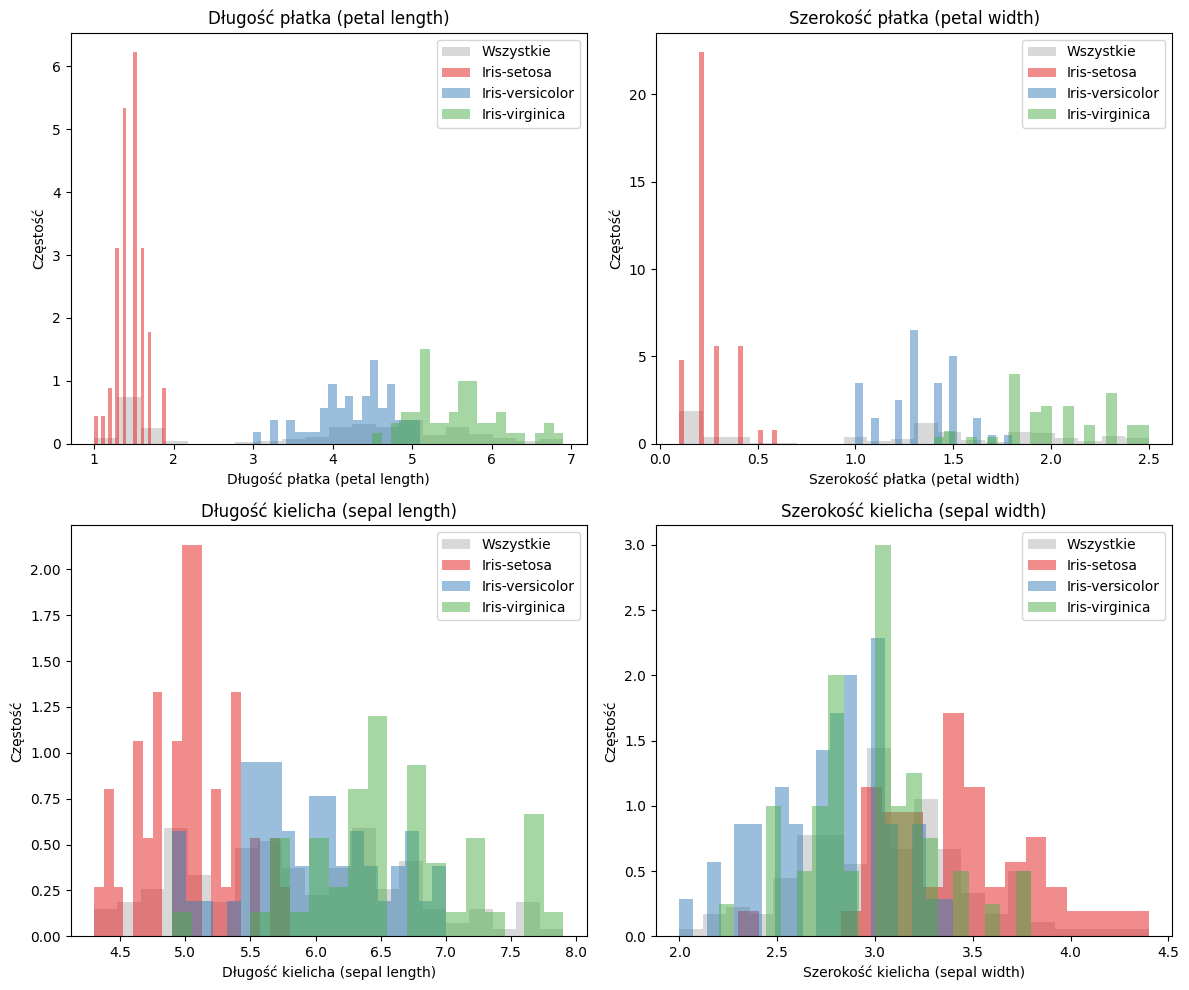

In [115]:

features = ['długość płatka (petal length)', 'szerokość płatka (petal width)', 'długość kielicha (sepal length)', 'szerokość kielicha (sepal width)']
species_list = df['klasa (class)'].unique()
seaborn_colors = sns.color_palette('Set1', n_colors=len(species_list))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 siatka

for idx, feature in enumerate(features):
    ax = axes[idx//2, idx % 2]
    # Histogram całości
    ax.hist(df[feature], bins=20, alpha=0.3, color='gray', label='Wszystkie', density=True )
    # Histogramy dla każdego gatunku
    for i, species in enumerate(species_list):
        ax.hist(df[df['klasa (class)'] == species][feature], bins=20, alpha=0.5, label=species, density=True, color=seaborn_colors[i])
        ax.legend()
    ax.set_title(feature.replace('_', ' ').capitalize())
    ax.set_xlabel(feature.replace('_', ' ').capitalize())
    ax.set_ylabel('Częstość')

plt.tight_layout()
plt.show()

##### Cechy płatków (zarówno długość, jak i szerokość) bardzo dobrze pozwalają odróżnić Iris-setosa od dwóch pozostałych gatunków, praktycznie bez nakładania rozkładów. Iris-versicolor i Iris-virginica częściowo się pokrywają, ale virginica ma większe wartości obu cech. Cechy kielicha (szczególnie szerokość) charakteryzują się większym nakładaniem rozkładów i są mniej przydatne do klasyfikacji.

# 5. Relacje między kolumnami

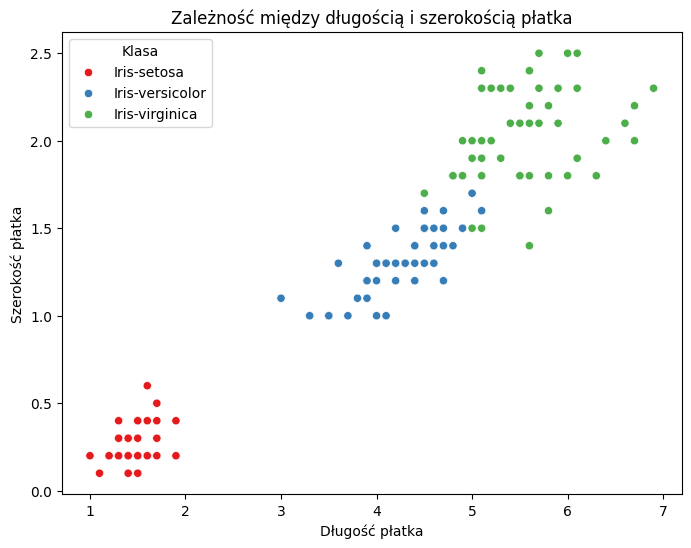

In [116]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='długość płatka (petal length)', y='szerokość płatka (petal width)', data=df, hue='klasa (class)', palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Zależność między długością i szerokością płatka')
plt.legend(title='Klasa')
plt.show()

##### Silny podział na gatunki
Iris-setosa (niebieskie punkty) jest jednoznacznie oddzielona od innych gatunków. Jej wartości długości i szerokości płatka są znacznie niższe w porównaniu do pozostałych—tworzy wyraźny, wydzielony skup punktów w lewym dolnym rogu wykresu.
##### Dodatnia korelacja
Widać też, że długość płatka jest silnie dodatnio skorelowana z szerokością płatka — im dłuższy płatek, tym na ogół szerszy, niezależnie od gatunku.

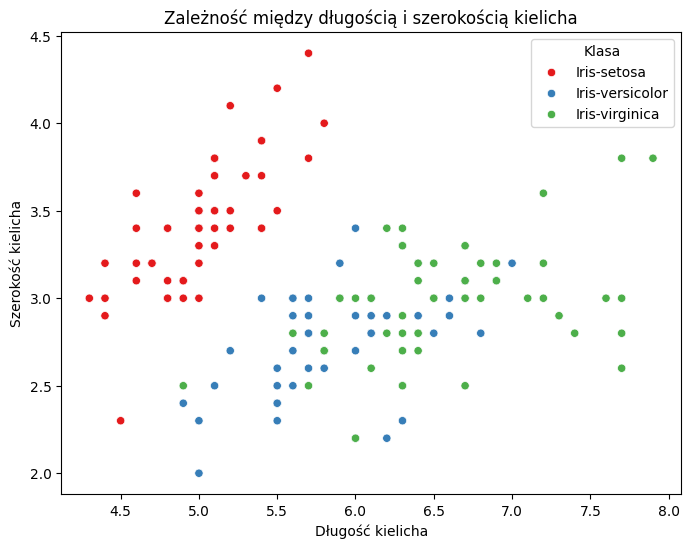

In [124]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='długość kielicha (sepal length)', y='szerokość kielicha (sepal width)', data=df, hue='klasa (class)', palette='Set1')
plt.xlabel('Długość kielicha')
plt.ylabel('Szerokość kielicha')
plt.title('Zależność między długością i szerokością kielicha')
plt.legend(title='Klasa')
plt.show()

##### Słaba korelacja
W odróżnieniu od płatków, długość i szerokość kielicha nie wykazują wyraźnej korelacji liniowej dla wszystkich gatunków.

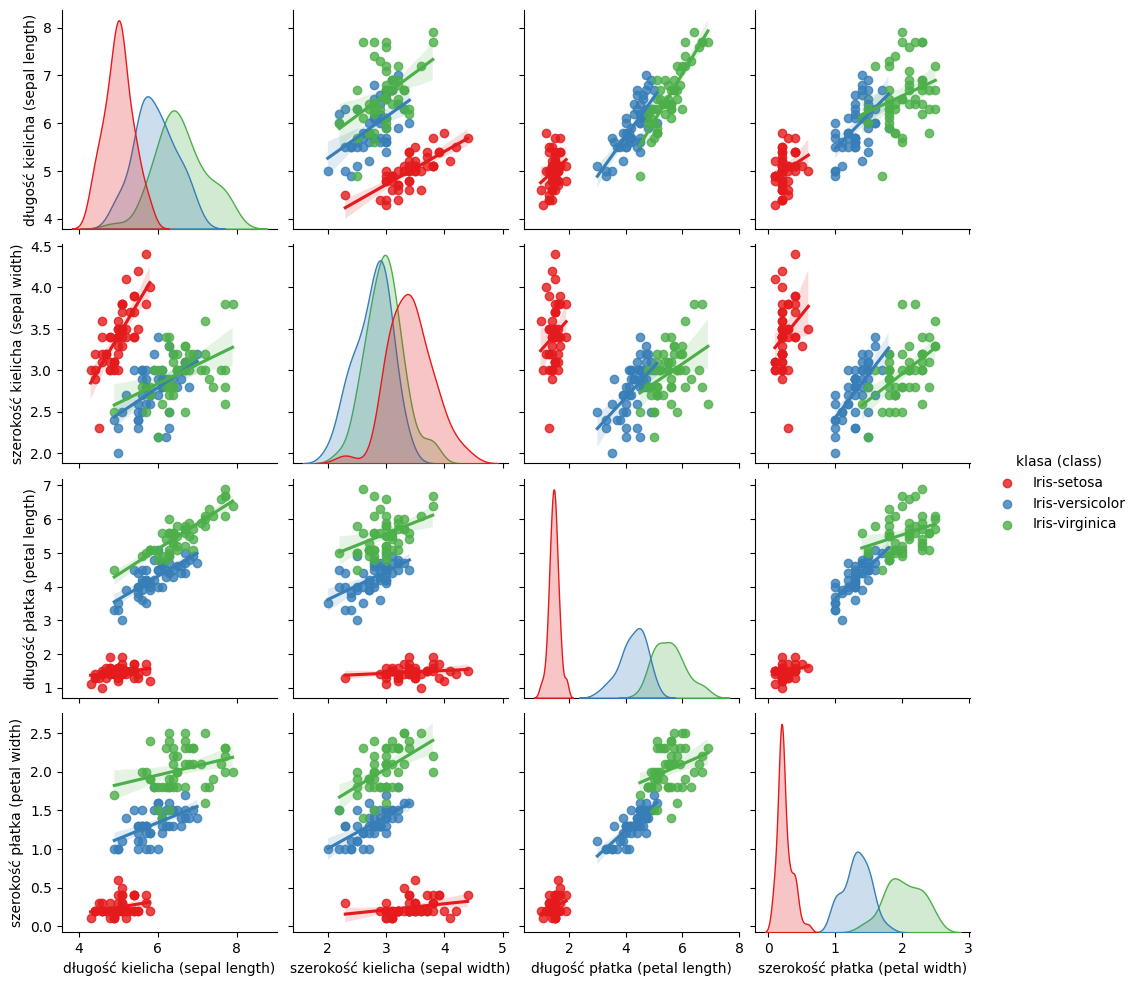

In [119]:

sns.pairplot(df, hue="klasa (class)", kind='reg', diag_kind="kde", palette="Set1")
plt.show()

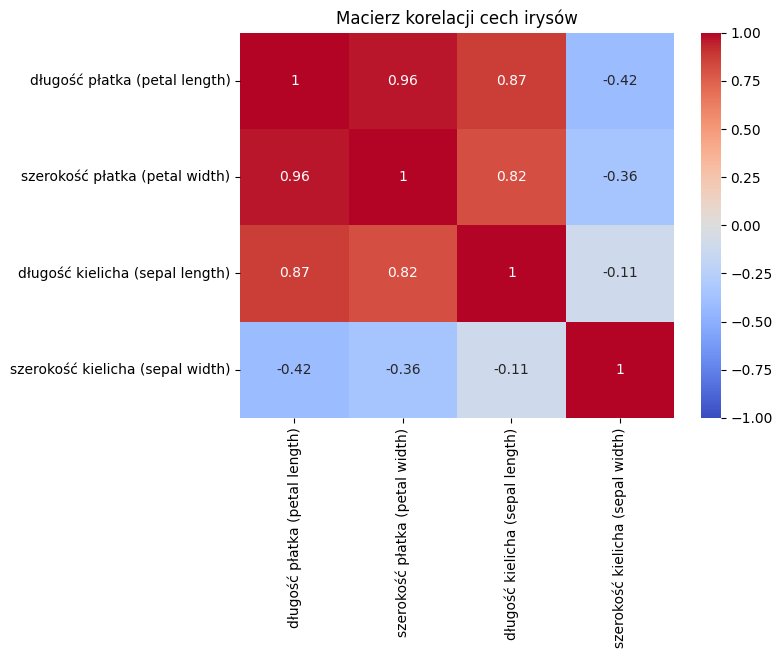

In [122]:

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Macierz korelacji cech irysów")
plt.show()

##### Interpretacja
Liczby bliskie 1 i -1 oznaczają silną (dodatnią lub ujemną) korelację danej pary cech, np. długość płatka i szerokość płatka są bardzo mocno skorelowane, podobnie długość kielicha i długość płatka.
Liczby bliskie 0 oznaczają brak korelacji.

# 6. Analiza wartości odstających

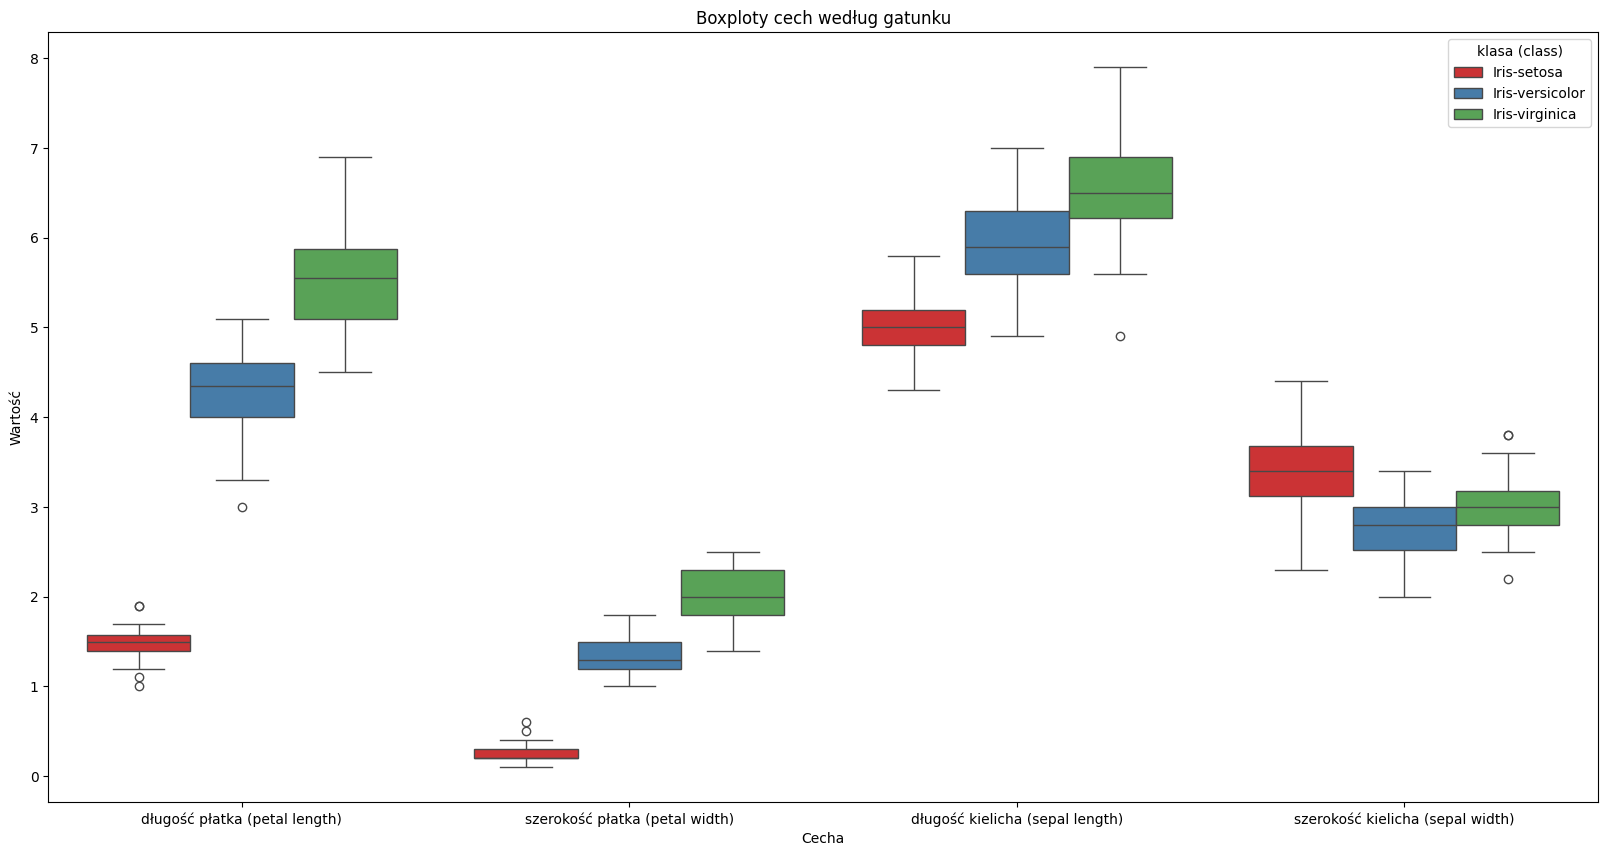

In [148]:

df_melt = df.melt(id_vars='klasa (class)', value_vars=features,
                  var_name='Cecha', value_name='Wartość')

plt.figure(figsize=(20, 10))
sns.boxplot(x='Cecha', y='Wartość', hue='klasa (class)', data=df_melt, palette="Set1")
plt.title('Boxploty cech według gatunku')
plt.show()

#####
Wykres boxplot pokazuje, że cechy płatków (zarówno długość, jak i szerokość) bardzo dobrze rozdzielają gatunki irysów, szczególnie Iris-setosa, która ma wyraźnie niższe wartości tych cech niż pozostałe gatunki. Długość i szerokość kielicha są mniej przydatne do rozróżniania – ich rozkłady dla różnych gatunków nakładają się. Boxplot ułatwia również wychwycenie pojedynczych nietypowych obserwacji 

## Wykresy, statystyki oraz macierz korelacji wykazały, że najłatwiej odróżnić Iris-setosa, zwłaszcza za pomocą cech płatków. Pozostałe dwa gatunki różnią się głównie wartościami długości i szerokości płatka, choć ich rozkłady częściowo się pokrywają. Szerokość kielicha jest cechą najsłabiej różnicującą. 